In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow

In [658]:
df = pd.read_csv("data.csv")

In [659]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


### 1. Análisis descriptivo de los datos:

#### 1.1 De las variables numéricas, hallar datos estadísticos.

In [660]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
liked                 int64
dtype: object

En el output anterior podemos ver como todas las variables del dataset de la actividad son de carácter numérico. Podemos dividir las categorías en dos tipos de data types, int64 y float64.
+ Los data types int64 solo pueden adquirir valores discretos, es decir, aquellos números positivos y negativos, incluido el cero, que no tienen parte decimal dentro de su estructura
+ Los data types float64 
+ El 64 simplemente se refiere a la memoria asignada para almacenar datos en cada celda; eso se refiere a la cantidad de dígitos que puede efectivamente almacenar cada “celda”

In [661]:
num = df.select_dtypes(np.number)
cat = df.select_dtypes(object)

In [662]:
df.shape, num.shape, cat.shape

((195, 14), (195, 14), (195, 0))

Al ser todas las variables numéricas seguiremos trabajando con el datafram 'df' original ya que comprende la misma información que el numérico 'num'

In [663]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


El output de la celda superior nos muestra un resumen de las variables estadísticas más representativas a la hora de realizar un análisis explotatorio de los datos. Podemos observar como todas las variables contienen 195 instancias de los cuales conocemos todos los valores, es decir, no hay valores nulos o vacíos.
En la segunda fila tenemos los valores medios de cada una de las variables

In [664]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [665]:
df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
5,0.778,0.6320,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.8270,140.951,224029,4,1
6,0.666,0.5890,0,-8.405,0,0.3240,0.5550,0.000000,0.1140,0.7760,74.974,146053,4,1
7,0.922,0.7120,7,-6.024,1,0.1710,0.0779,0.000040,0.1750,0.9040,104.964,161800,4,1
8,0.794,0.6590,7,-7.063,0,0.0498,0.1430,0.002240,0.0944,0.3080,112.019,247460,4,0
9,0.853,0.6680,3,-6.995,1,0.4470,0.2630,0.000000,0.1040,0.7450,157.995,165363,4,1


In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [667]:
# num.columns[0:-1]

In [668]:
# sns.pairplot(num)
# plt.show()

### 1.2. Crear matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analiza los resultados. 

In [669]:
df.corr()['liked'] 

danceability        0.569425
energy              0.176179
key                -0.044406
loudness            0.410774
mode                0.023747
speechiness         0.591505
acousticness       -0.179375
instrumentalness   -0.569440
liveness           -0.009797
valence             0.268653
tempo               0.371202
duration_ms        -0.490651
time_signature      0.221479
liked               1.000000
Name: liked, dtype: float64

No conviene eliminar las variables correlacionadas de cualquier manera, sólo cuando la correlación es tan fuerte que no aportan información adicional. Esto depende tanto de la fuerza de la correlación como de la cantidad de datos de que disponga y de si cualquier pequeña diferencia entre variables correlacionadas dice algo sobre el resultado.
Es por eso que he decidido poner un threshold superior e inferior en 0.9 ya que mayores correlaciones pueden suponer un problema y que no solo no aporten información al modelo si no que empeoren su rendimiento. 

Pero si lo que le preocupa es la interpretabilidad, entonces puede tener sentido eliminar una de las variables, aunque la correlación sea leve. Esto es especialmente cierto en el caso de los modelos lineales. Uno de los supuestos de la regresión lineal es la ausencia de multicolinealidad perfecta en los predictores.

In [670]:
drop_columns= df.corr()['liked'][(df.corr()['liked'] >= 0.9) & (df.corr()['liked'] <= -0.9)]

In [671]:
df.drop(columns=list(drop_columns.index), axis=1, inplace=True)

Las variables que tienen una correlación cercana a 0 y por debajo de este valor están muy poco relacionadas con la variable objetivo. Esto quiere decir que aportan poca o nada información al modelo predictivo, por lo que las eliminaremos para crear el modelo.

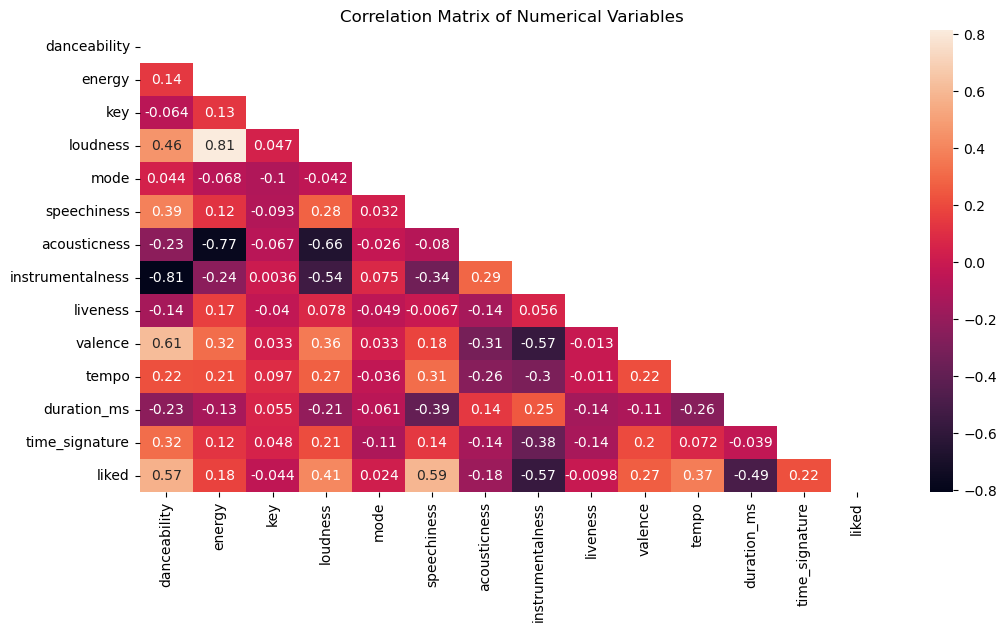

In [673]:
corr_matrix = num.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, mask=np.triu(corr_matrix)).set(title="Correlation Matrix of Numerical Variables")
plt.show()

Para empezar, la correlación entre "energy" y "loudness" está muy estrechamente relacionadas por lo que podemos decir que cuanto más decibelios tenga la canción más energía transmite al receptor.

Podemos observar como la variable "liked" tiene una correlación notable con las variables "danceability", "loudness", "speechiness". Esto parece denotar que nos gusta una canción más o menos atendiento a estos tres criterios, especialmente que sea bailable.

Por otra parte podemos observar que "instrumentalness" tiene correlación negativa con "liked", denotando que canciones puramente instrumentales no gustan tanto como cuando hay una voz. "loudness" tampoco se relaciona positivamente con "instrumentalness" denotando que la música puramente instrumental no gusta más cuanto más fuerte suene.

In [674]:
# [sns.displot(data=num, x=i, kde=True) for i in num.columns[0:-1]]
# plt.show()

### 2. Aplicar el algoritmo de máquina de vectores de soporte y redes neuronales. Decidir los parámetros de cada uno y justificar su conveniencia.

In [675]:
print("Keys del dataset:\n", num.keys())

Keys del dataset:
 Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')


+ Aplicar el algoritmo de máquina de vectores de soporte y redes neuronales. Decidir los parámetros de cada uno y justificar su conveniencia.

Podemos ver en el gráfico de dispersión cómo las variables "energy" y "loudness" están estrechamente relacionadas. También es palpable la soberana dificultad con la que tendríamos que dibujar una línea que permita separar satisfactoriamente las dos clases. Para poder clasificarlas deberemos haver uso de los hiperplanos de SVM.

Con un par de variables con menor correlación sigue siendo improbable que podamos clasificar con éxito la variable objetivo sin un hiperplano.

#### Train-test Split

In [676]:
X = df.drop(columns = ['liked'])
y = df['liked']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [703]:
X_train.shape, X_test.shape

((156, 13), (39, 13))

#### MinMax Scaler

In [679]:
from sklearn.preprocessing import MinMaxScaler
def EscaladorMinMax(data, MinMaxtransformer):
    X_normalized = MinMaxtransformer.transform(data)
    # print(X_normalized.shape)
    X_normalized = pd.DataFrame(X_normalized,columns=data.columns)
    return X_normalized

In [680]:
MinMaxtransformer = MinMaxScaler().fit(X_train)

In [681]:
X_train_scaled = EscaladorMinMax(X_train, MinMaxtransformer)
X_test_scaled = EscaladorMinMax(X_test, MinMaxtransformer)
X_scaled = pd.concat([X_train_scaled, X_test_scaled], axis=0)

In [682]:
X_train_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.654912,0.546095,0.363636,0.865348,0.0,0.046076,0.272360,0.000008,0.108013,0.081568,0.136253,0.283249,0.75
1,0.877834,0.705113,0.181818,0.942718,1.0,0.164389,0.062007,0.000000,0.017974,0.582627,0.641321,0.237458,0.75
2,0.416877,0.921498,0.363636,0.845435,1.0,0.132956,0.407033,0.000341,0.148329,0.811441,0.936587,0.298882,0.75
3,0.908060,0.688003,1.000000,0.854552,1.0,0.379149,0.599999,0.000001,0.123131,0.758475,0.791015,0.204393,0.75
4,0.836272,0.660829,0.636364,0.881603,0.0,0.042952,0.143716,0.002312,0.095246,0.288136,0.432553,0.294557,0.75


#### Logistic Regression

In [683]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga').fit(X_train, y_train)

c:\Users\JT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [684]:
clf_norm = LogisticRegression(solver='saga').fit(X_train_scaled, y_train)

Como podemos observar, el modelo de clasificación logística con los datos originales fracasa a la hora de entrenar el modelo, esto lo podemos ver con el warning que nos ofrece el output y comprobando las predicciones que arroja el modelo no normalizado, siendo estas todas erróneas o inexistentes.
Es por esto por lo que normalizar los datos es un paso necesario para poder avanzar en el desarrollo de los modelos necesarios para la actividad. Por lo tanto, desde este punto en adelante, los datos que se suministrarán a todos los modelos serán los normalizados previamente.

In [685]:
print("Rendimiento del set de entrenamiento no normalizado",clf.score(X_train, y_train),"%")
print("Rendimiento del set de entrenamiento normalizado",clf_norm.score(X_train_scaled,y_train),"%")

print("------------------------------")

print("Rendimiento del set de validación no normalizado",clf.score(X_test,y_test),"%")
print("Rendimiento del set de validación normalizado",clf_norm.score(X_test_scaled,y_test),"%")

Rendimiento del set de entrenamiento no normalizado 0.5192307692307693 %
Rendimiento del set de entrenamiento normalizado 0.9038461538461539 %
------------------------------
Rendimiento del set de validación no normalizado 0.358974358974359 %
Rendimiento del set de validación normalizado 0.9487179487179487 %


In [686]:
y_train_pred_LR = clf.predict(X_train)
y_test_pred_LR = clf.predict(X_test)
print("----Predicciones con datos no normalizados----")
print("{}\n{}".format(y_train_pred_LR[:20], y_test_pred_LR[:20]))

----Predicciones con datos no normalizados----
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [687]:
y_train_pred_LR = clf_norm.predict(X_train_scaled)
y_test_pred_LR = clf_norm.predict(X_test_scaled)
print("----Predicciones con datos normalizados----")
print("{}\n{}".format(y_train_pred_LR[:20], y_test_pred_LR[:20]))

----Predicciones con datos normalizados----
[0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1]
[0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1]


### Support Vector Machine model

In [688]:
# Create the model
model = SVC(gamma = 0.01, C = 1000, kernel = 'linear')

# Fitting the model, entrenamos con el train set y validamos con el test set
model.fit(X_train_scaled, y_train)

# Predicción de class labels en el set de entrenamiento
y_train_pred_SVM = model.predict(X_train_scaled)

# Predicción de class labels en el set de validación
y_test_pred_SVM = model.predict(X_test_scaled)

# Evaluación en el set de validación
print("Score of the model:", model.score(X_test_scaled, y_test), "%")

Score of the model: 0.9230769230769231 %


In [689]:
print("-------Confusion Matrix train set-------")
# print(confusion_matrix(y_train,y_train_pred_SVM))

confusion_matrix_train = pd.crosstab(
    y_train.ravel(),
    y_train_pred_SVM,
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix_train)


# Matriz de confusión para el set de validación
print("-------Confusion Matrix test set-------")
# print(confusion_matrix(y_test,y_test_pred_SVM))

confusion_matrix_test = pd.crosstab(
    y_test.ravel(),
    y_test_pred_SVM,
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix_test)


-------Confusion Matrix train set-------
Predicción   0   1
Real              
0           75   6
1            4  71
-------Confusion Matrix test set-------
Predicción   0   1
Real              
0           13   1
1            2  23


In [690]:
# Report de clasificación para evaluear el modelo
print("-------Classification Report Train Set-------")
print(classification_report(y_train, y_train_pred_SVM))

# Report de clasificación para evaluear el modelo
print("-------Classification Report Test Set-------")
print(classification_report(y_test, y_test_pred_SVM))

-------Classification Report Train Set-------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        81
           1       0.92      0.95      0.93        75

    accuracy                           0.94       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156

-------Classification Report Test Set-------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.96      0.92      0.94        25

    accuracy                           0.92        39
   macro avg       0.91      0.92      0.92        39
weighted avg       0.93      0.92      0.92        39



#### Plots SVM

In [691]:
def plot_scatter(columna1, columna2):
    import matplotlib
    colors = ['red','green','blue']
    label = num['liked']


    plt.xlabel(columna1)
    plt.ylabel(columna2)

    plt.scatter(num[columna1], num[columna2], c=label, cmap=matplotlib.colors.ListedColormap(colors))
    plt.show()

In [692]:
num.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

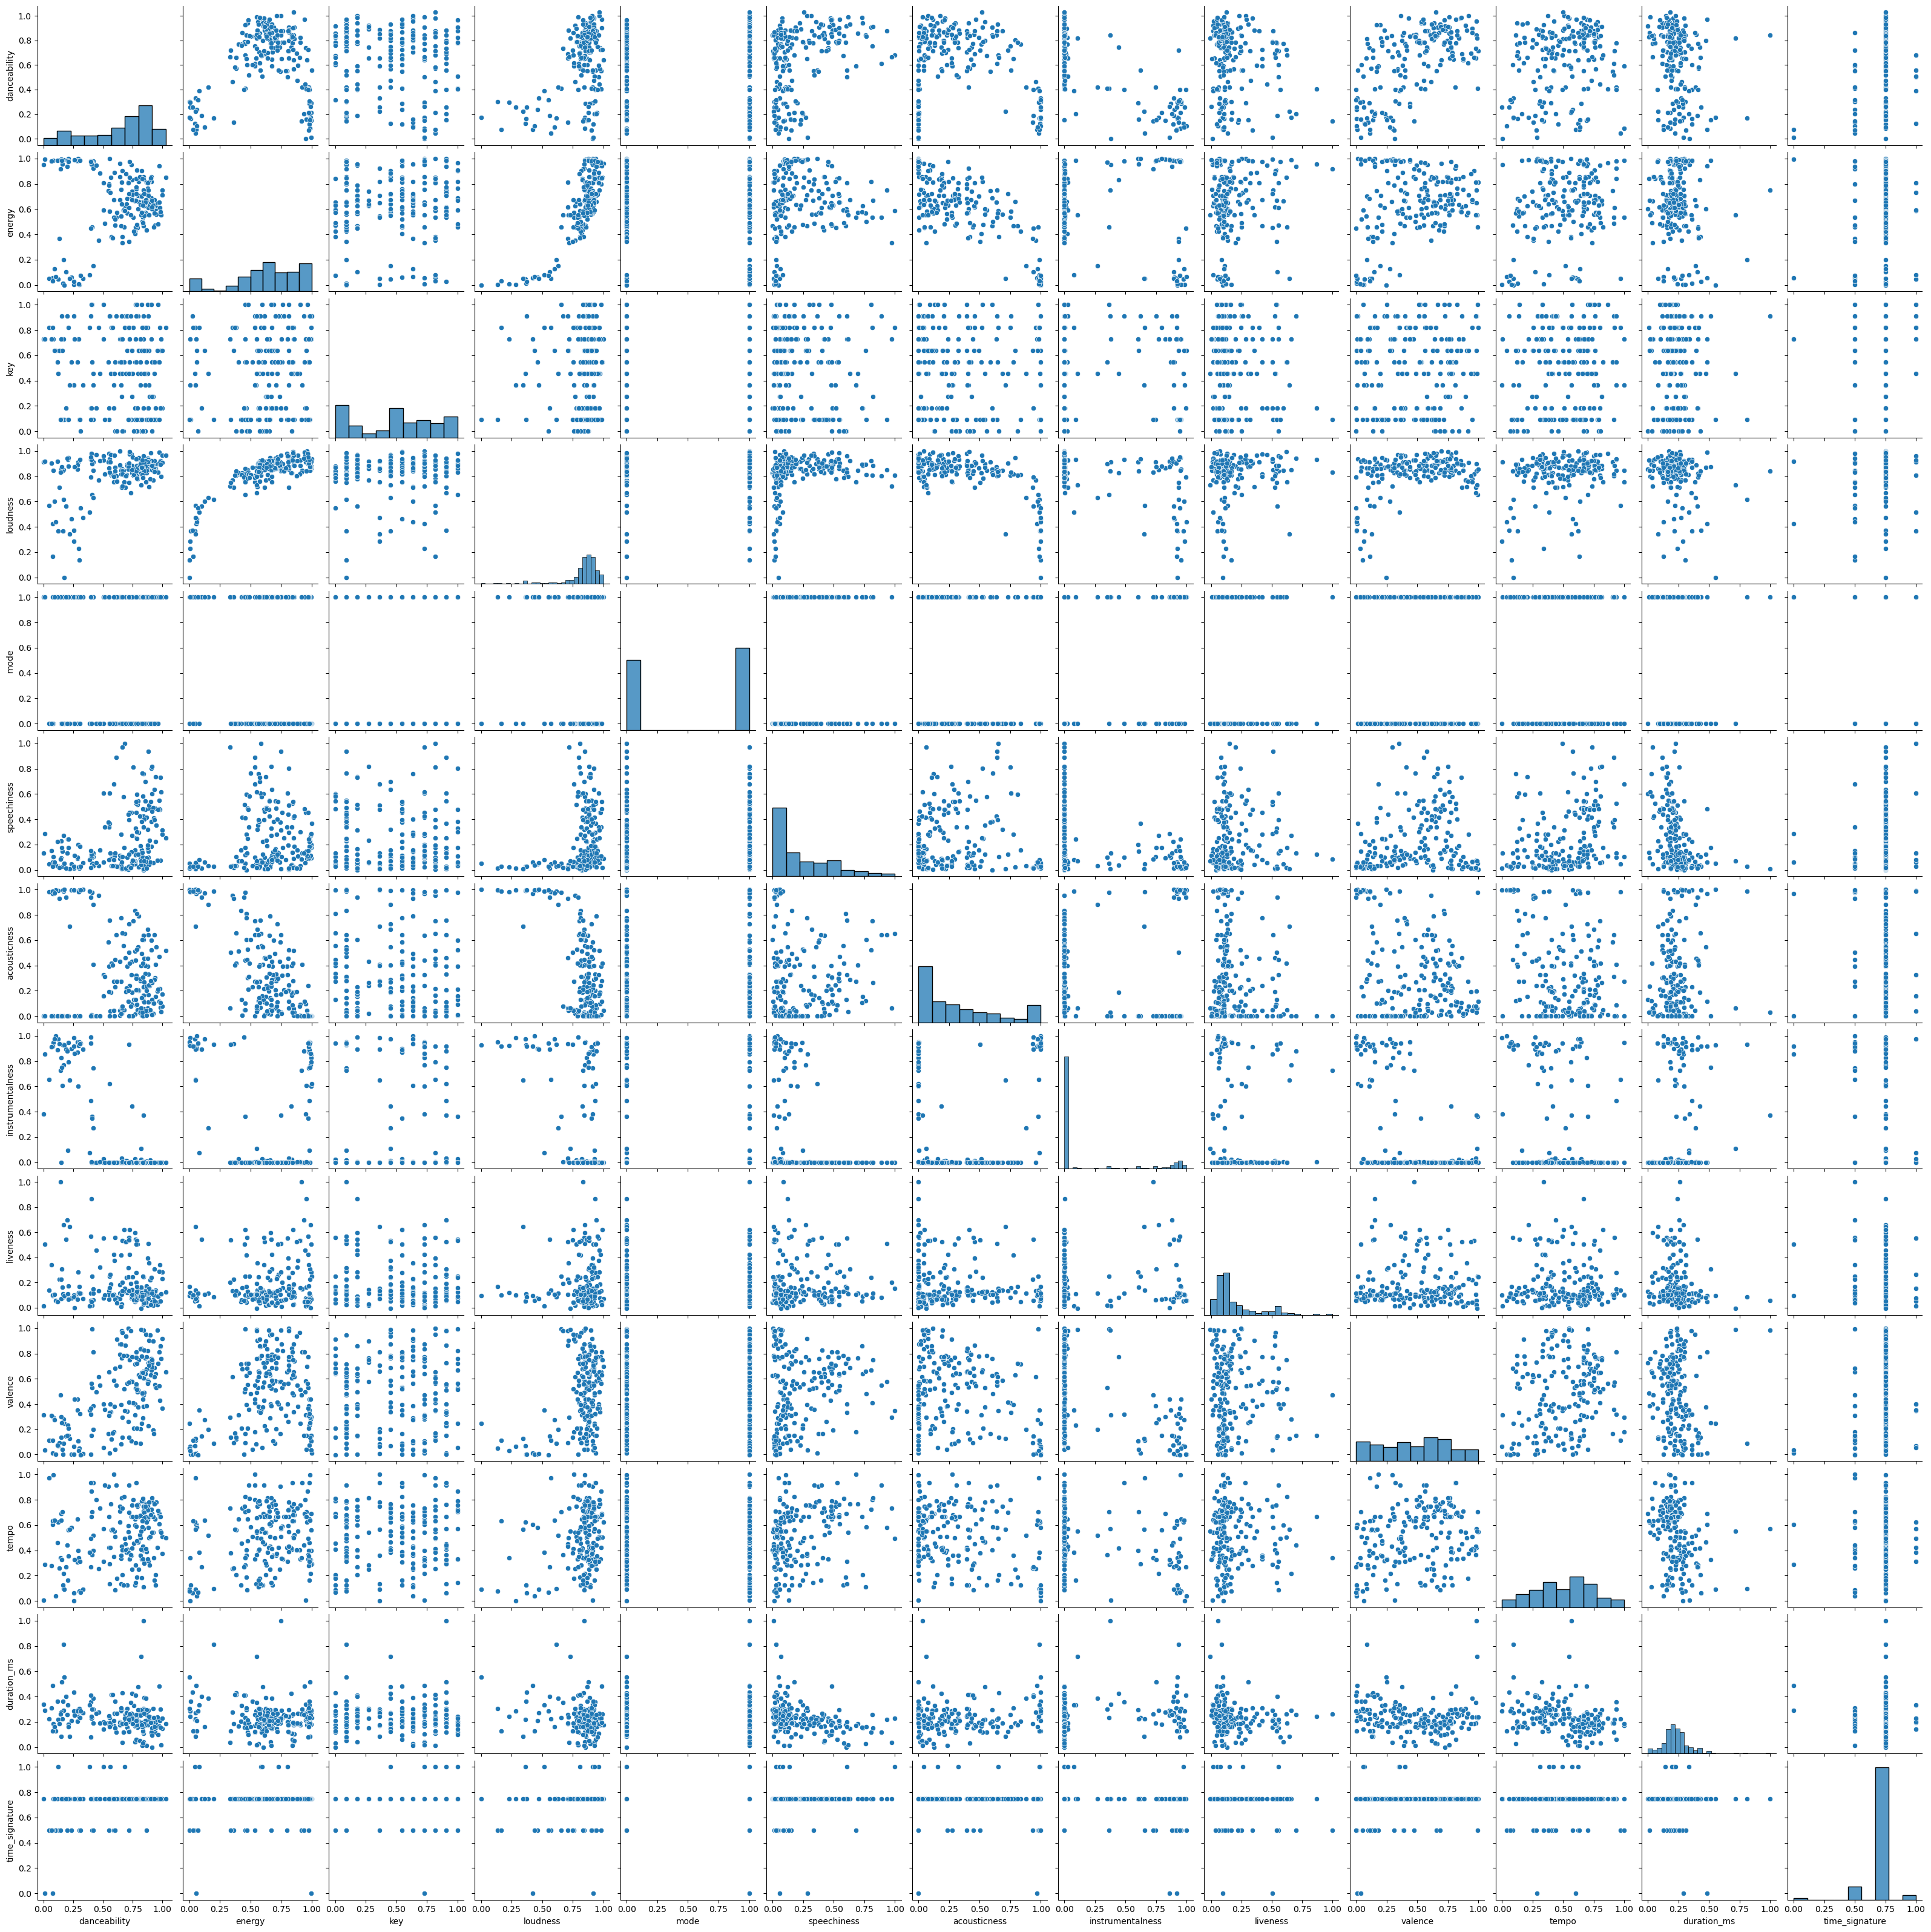

In [693]:
sns.pairplot(X_scaled)
plt.show()

In [694]:
def plot_hyperplane(columna1, columna2):
    X = num[[columna1, columna2]]
    y = num['liked']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=73)
    model = SVC(C = 100, kernel = 'linear', random_state=73)
    model.fit(X_train, y_train)
    x = np.linspace(np.min(X_train[columna1]), np.max(X_train[columna1]), 50)
    y = np.linspace(np.min(X_train[columna2]), np.max(X_train[columna2]), 50)
    Y, X = np.meshgrid(y, x)
    grid = np.vstack([X.ravel(), Y.ravel()]).T

    # Predicción valores grid
    pred_grid = model.predict(grid)

    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.5)
    ax.scatter(X_train[columna1], X_train[columna2], c=y_train, alpha = 1)

    # Vectores soporte
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=150, linewidth=1,
        facecolors='none', edgecolors='black'
    )

    # Hiperplano de separación
    ax.contour(
        X,
        Y,
        model.decision_function(grid).reshape(X.shape),
        colors = 'k',
        levels = [-1, 0, 1],
        alpha  = 0.2,
        linestyles = ['--', '-', '--']
    )

    ax.set_title("Resultados clasificación SVM lineal");

In [695]:
num.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

c:\Users\JT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\JT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


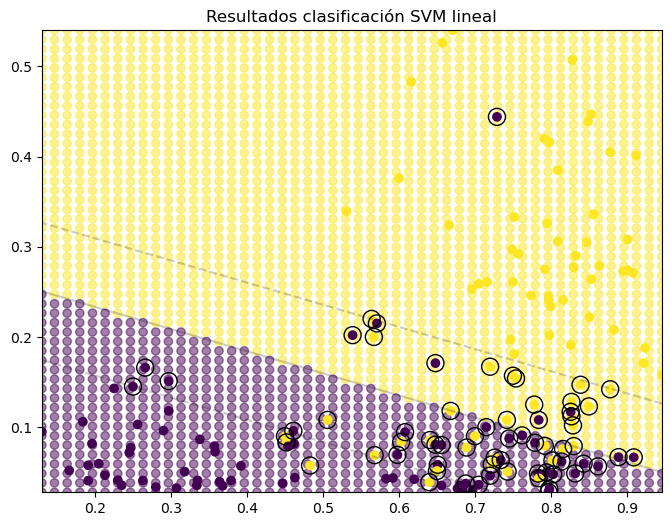

In [696]:
plot_hyperplane("danceability", "speechiness")

#### Neural Network

In [697]:
# red_neuronal()
def red_neuronal(input_layer, hidden_layer_neurons, output_layer,output_activation , epochs, batch_size):
    from keras.models import Sequential
    from keras.layers import Dense 

    # Build the model.
    model = Sequential([ # as far as we know, all networks are sequential
        Dense(hidden_layer_neurons, activation='relu', input_shape=(input_layer,)), # 7hidden_layer_neurons= 26*26 dense networks means all neurons in one layer are connected to all neurons of the next layer
        # Dense(hidden_layer_neurons, activation='relu'), # choosing relu instead of sigmoid, this is somewhat common
        Dense(output_layer, activation=output_activation),     # the softmax actiavation is the last one to compensate for the high volume additions
    ])

    # Compile the model.
    model.compile(
        optimizer='adam', #here we could use stochastic gradient descent, but adam is a de facto standard
        loss='sparse_categorical_crossentropy', #this is how we create the original blame to play the blame game
        metrics=['accuracy'],
    )

    # Train the model.
    history = model.fit(
        X_train_scaled,
        (y_train), # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
        epochs = epochs, # go 25 times through the whole dataset
        batch_size = batch_size, # send 6 labels at a time before you tweak the network again, to make it faster
        shuffle=True,
        validation_data=(X_test_scaled, y_test),
        verbose=0
    )

    # Evaluate the model.
    model.evaluate(
        X_test_scaled,
        y_test
    )

In [698]:
# red_neuronal(input_layer, hidden_layer_neurons, output_layer,output_activation , epochs, batch_size)
history = red_neuronal(X_train_scaled.shape[1], 32, 2,"softmax", 30, 8)

2/2 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9487


In [699]:
history = red_neuronal(X_train_scaled.shape[1], 32, 2,"relu", 30, 8)

2/2 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.3590


In [700]:
history = red_neuronal(X_train_scaled.shape[1], 16, 2,"sigmoid", 30, 8)

2/2 [==============================] - 0s 500us/step - loss: 0.2692 - accuracy: 0.9231


In [701]:
history = red_neuronal(X_train_scaled.shape[1], 32, 2,"sigmoid", 30, 8)

2/2 [==============================] - 0s 1000us/step - loss: 0.2399 - accuracy: 0.9487


Podemos observar como con una única capa oculta de 2<sup>n</sup> neuronas y eligiendo correctamente las dimensiones tanto de la capa de entrada como de la capa de salida.
¿Por qué 2<sup>n</sup> para la capa oculta? Diría que esto no es un hecho general. En cambio, parece un consejo mal entendido buscar algunos hiperparámetros, como el número de neuronas en cada capa, aumentando o disminuyendo en un factor de 2. Hacer esto y probar tamaños de capa de 32, 64, 128, etc. debería aumentar la velocidad de encontrar un buen tamaño de capa en comparación con probar tamaños de 32, 33, 34, etc.

La razón principal para elegir potencias de 2 es la tradición en informática. Si no hay ningún motivo para elegir otros números específicos, se puede elegir una potencia de 2... pero también se pueden ver investigadores que eligen múltiplos de 10, 100 o 1000 como "números redondos", por una razón similar.

#### Loss & Accuracy Plots for the NN

In [702]:
history.history.keys()

AttributeError: 'NoneType' object has no attribute 'history'

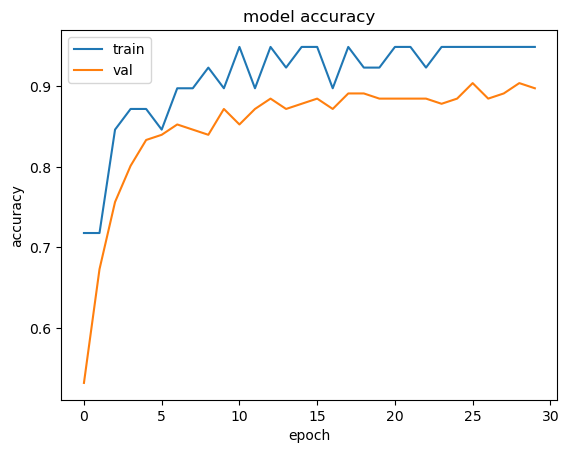

In [ ]:
plt.plot(figsize=(8,5))
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

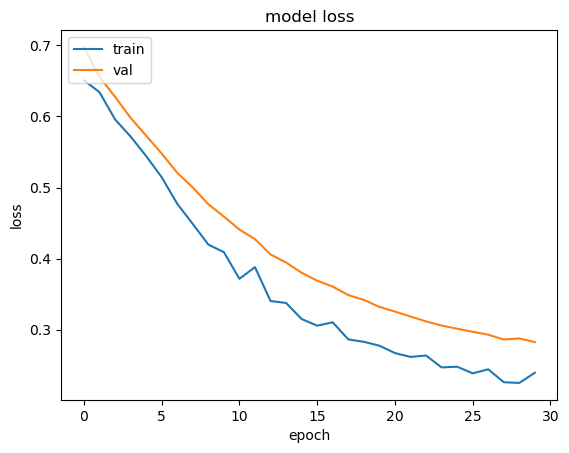

In [ ]:
plt.plot(figsize=(8,5))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

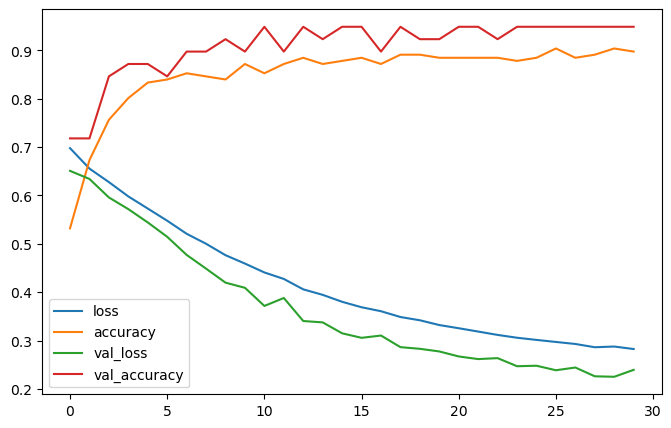

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()